In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Custom
import env
import wrangle_zillow

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
df = wrangle_zillow.wrangle_zillow()
df.head()

Saving to .csv


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410
4,10887214,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,3101.0,96451.0,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940


In [3]:
# Check shape
df.shape

(67977, 21)

In [4]:
# Column info
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror'],
      dtype='object')

### Gonna do a little bit of Feature Engineering:
- Create an age column.
- Split the dataset into Train, Validate and Test samples.
- Establish x and y variables.
- Scale the x variables.

In [5]:
# Lets create an age column
df.yearbuilt = df.yearbuilt.astype(int)
df['age'] = 2017 - df.yearbuilt
df.yearbuilt = df.yearbuilt.astype(object)

df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,96978.0,0.0,1998,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,19
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,97099.0,5.0,1967,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,50
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,97078.0,6.0,1962,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,55
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,96330.0,0.0,1970,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,47
4,10887214,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,96451.0,0.0,1964,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,53


In [6]:
# train, validate, test split
train, validate, test = wrangle_zillow.split_data(df)

train <> (38066, 22)
validate <> (16315, 22)
test <> (13596, 22)


In [7]:
# Isolating our target variable
x_train = train.drop(columns=['logerror'])
y_train = train.logerror

x_validate = validate.drop(columns=['logerror'])
y_validate = validate.logerror

x_test = test.drop(columns=['logerror'])
y_test = test.logerror

# Scaling
x_train_scaled, x_validate_scaled, x_test_scaled = wrangle_zillow.scale_data(x_train, x_validate, x_test)

train_scaled <> (38066, 21)
validate_scaled <> (16315, 21)
test_scaled <> (13596, 21)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67977 entries, 0 to 77573
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      67977 non-null  int64  
 1   bathroomcnt                   67977 non-null  float64
 2   bedroomcnt                    67977 non-null  float64
 3   buildingqualitytypeid         67977 non-null  float64
 4   calculatedfinishedsquarefeet  67977 non-null  float64
 5   fips                          67977 non-null  float64
 6   latitude                      67977 non-null  float64
 7   longitude                     67977 non-null  float64
 8   lotsizesquarefeet             67977 non-null  float64
 9   rawcensustractandblock        67977 non-null  float64
 10  regionidcity                  67977 non-null  float64
 11  regionidcounty                67977 non-null  float64
 12  regionidzip                   67977 non-null  float64
 13  r

## Exploration

### Univariate up first

- We'll explore our variables with visualizations.

In [9]:
# Glancing at our data
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
count,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,6.797700e+04,6.797700e+04,...,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,67977.0,6.797700e+04,67977.000000,67977.000000,67977.000000
mean,1.301859e+07,2.202208,2.979361,6.314400,1675.335643,6049.441002,3.400452e+07,-1.181922e+08,2.785835e+04,6.049738e+07,...,2497.538903,96599.725907,1.602057,1.633991e+05,4.128805e+05,2016.0,2.494814e+05,5062.504630,0.016567,48.171514
std,2.138710e+06,0.841592,0.980254,1.316425,764.510956,20.981742,2.689044e+05,3.618898e+05,1.204185e+05,2.082548e+05,...,814.755364,3314.077112,2.907933,1.267090e+05,3.029315e+05,0.0,2.225690e+05,3494.811018,0.164081,22.792962
min,1.071186e+07,0.000000,0.000000,1.000000,128.000000,6037.000000,3.333953e+07,-1.194753e+08,2.360000e+02,6.037101e+07,...,1286.000000,95982.000000,0.000000,4.400000e+01,3.254000e+03,2016.0,1.610000e+02,19.920000,-4.655420,1.000000
25%,1.153706e+07,2.000000,2.000000,6.000000,1156.000000,6037.000000,3.380559e+07,-1.184068e+08,6.000000e+03,6.037400e+07,...,1286.000000,96212.000000,0.000000,8.177700e+04,1.986290e+05,2016.0,7.919000e+04,2620.300000,-0.023628,31.000000
50%,1.260270e+07,2.000000,3.000000,6.000000,1488.000000,6037.000000,3.401119e+07,-1.181600e+08,7.313000e+03,6.037621e+07,...,3101.000000,96412.000000,0.000000,1.309070e+05,3.466180e+05,2016.0,1.960000e+05,4277.300000,0.006325,47.000000
75%,1.426033e+07,3.000000,4.000000,7.000000,1996.000000,6059.000000,3.417698e+07,-1.179139e+08,1.044100e+04,6.059052e+07,...,3101.000000,96993.000000,0.000000,2.048630e+05,5.389580e+05,2016.0,3.492460e+05,6506.950000,0.037433,63.000000
max,1.629608e+08,10.000000,11.000000,12.000000,8251.000000,6111.000000,3.481877e+07,-1.175723e+08,6.971010e+06,6.111009e+07,...,3101.000000,399675.000000,14.000000,1.646927e+06,2.090230e+06,2016.0,1.786325e+06,19997.540000,3.394544,139.000000


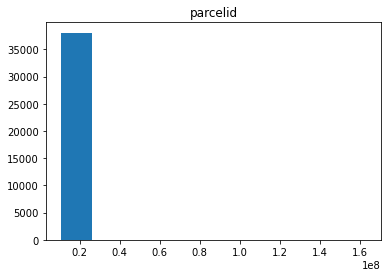

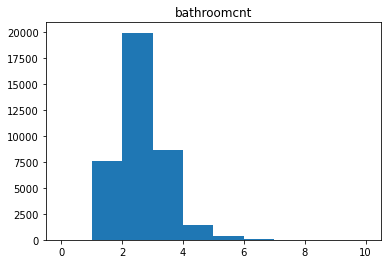

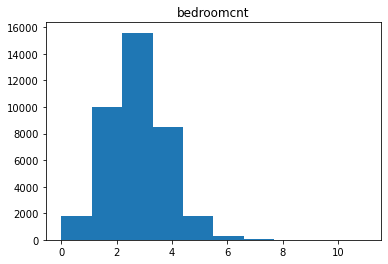

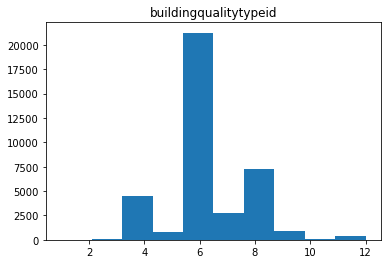

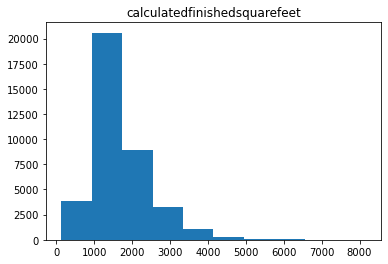

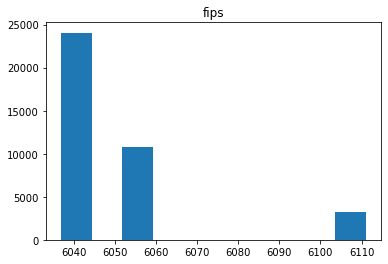

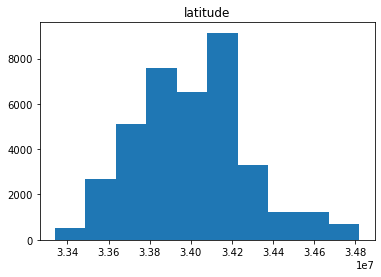

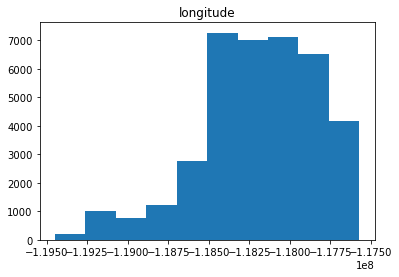

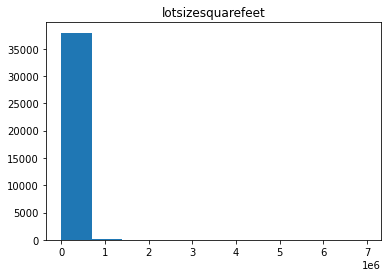

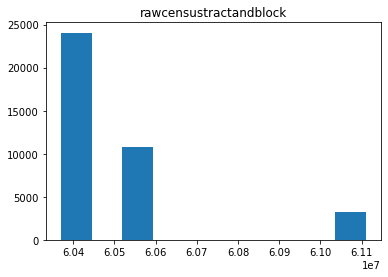

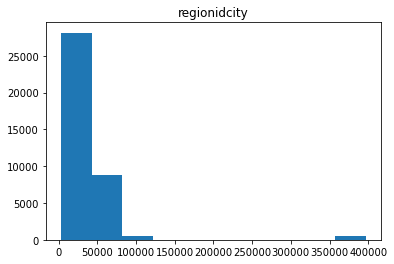

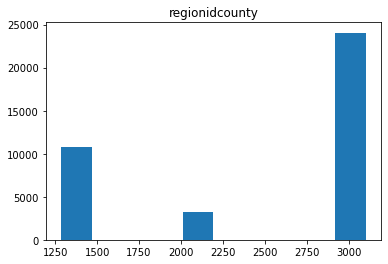

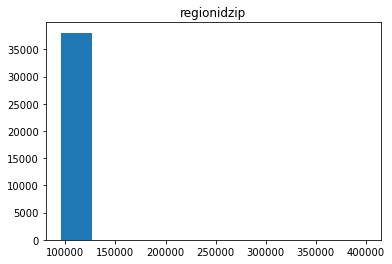

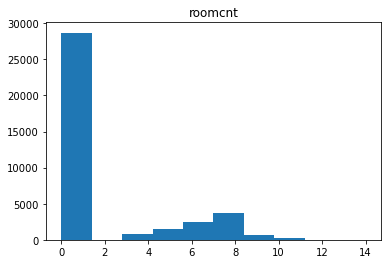

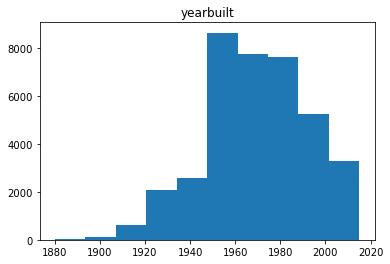

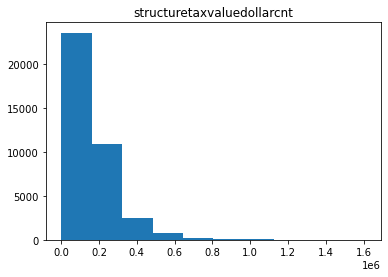

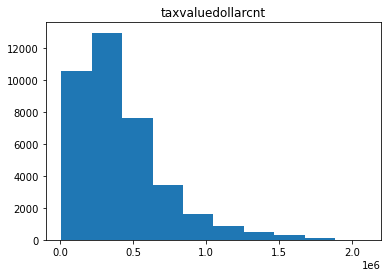

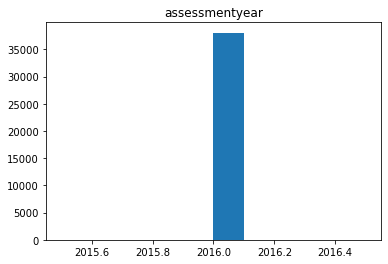

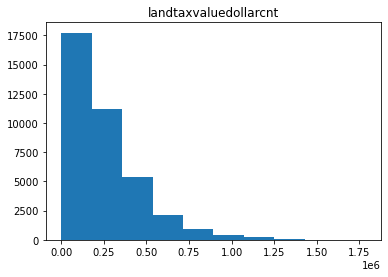

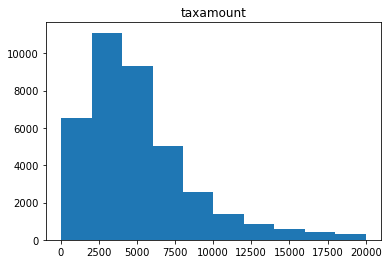

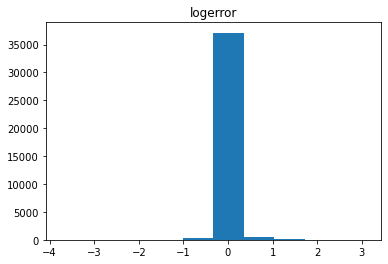

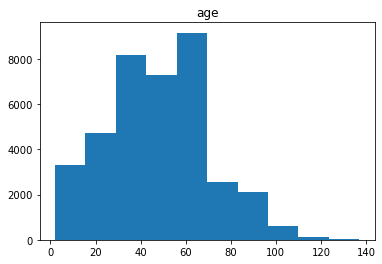

In [10]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

#### Takeaways
- For the most part, a lot of variables are normally distributed.
- structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount seem to be skewed to the right.

### Multivariate up next
- We're focusing on variables that will give us insight into our target.
- 

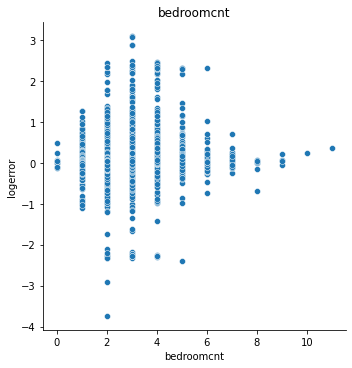

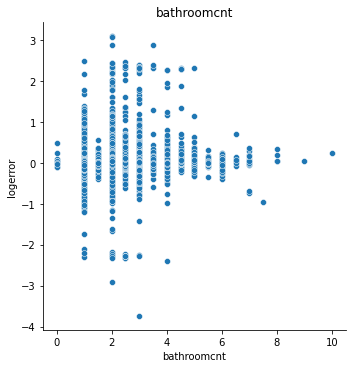

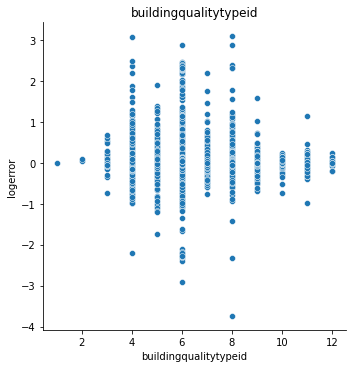

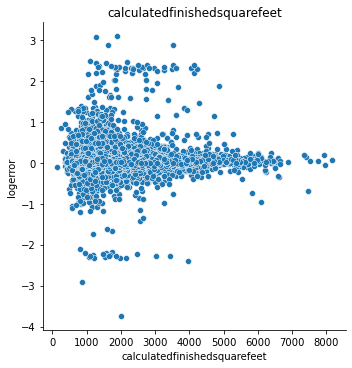

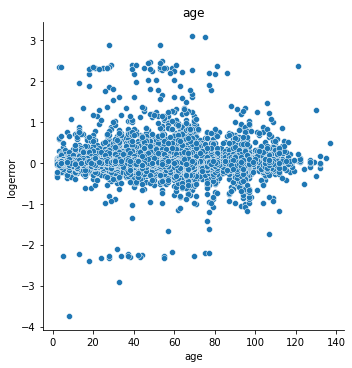

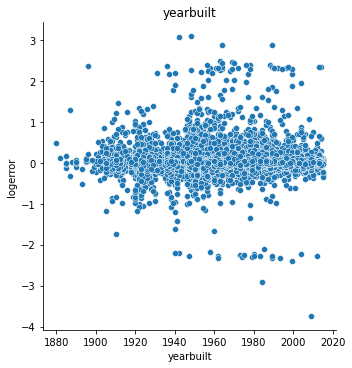

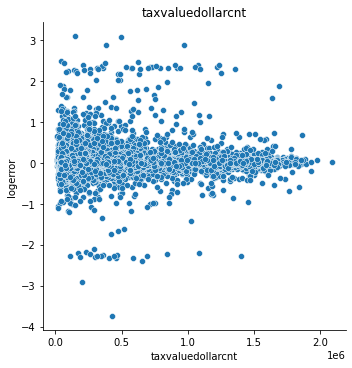

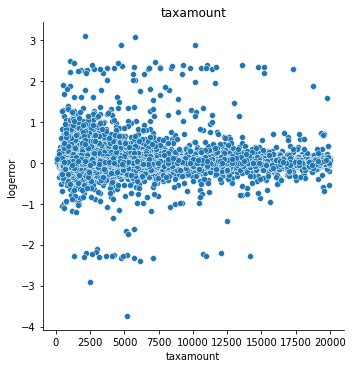

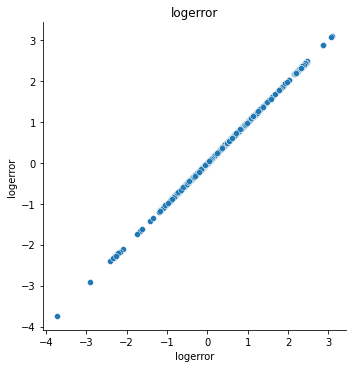

In [11]:
explore_columns = ['bedroomcnt', 'bathroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'age', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']

for col in train[explore_columns]:
    sns.relplot(x=train[col], y=train.logerror)
    plt.title(col)
    plt.show()

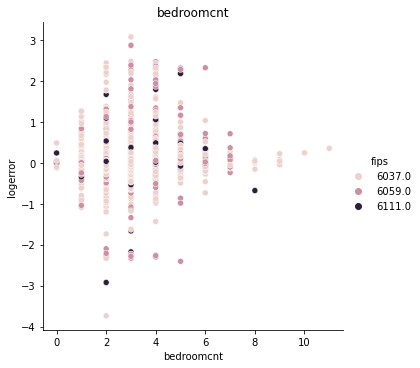

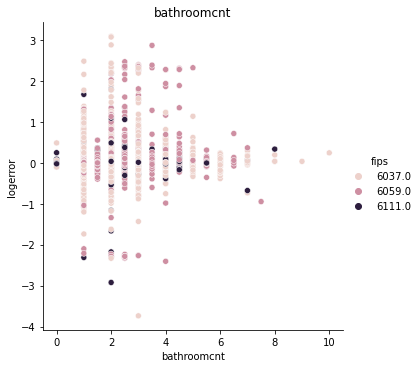

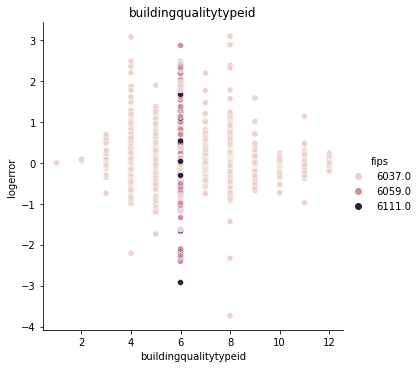

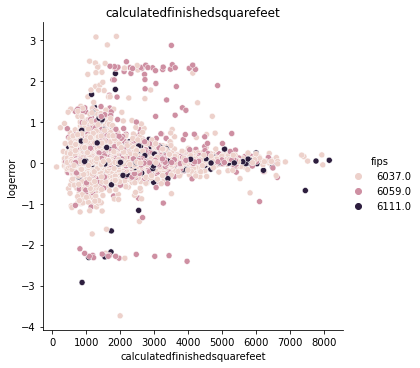

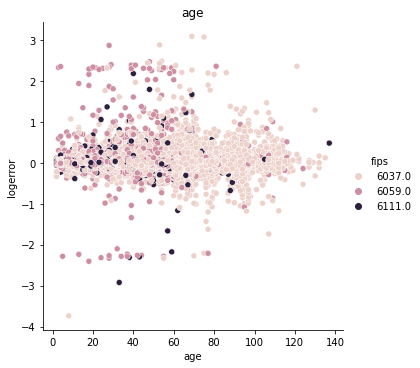

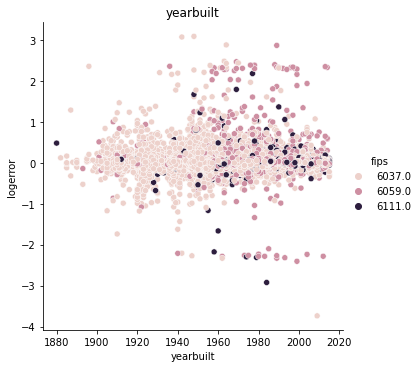

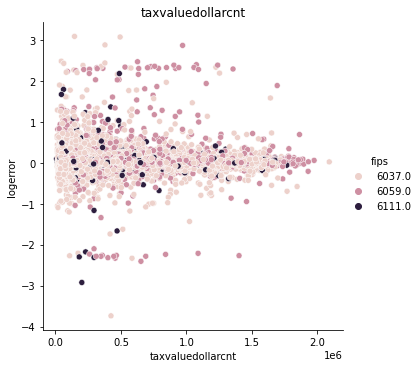

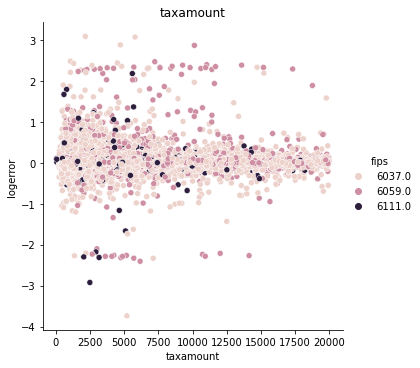

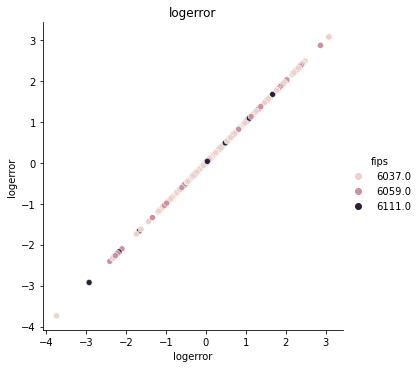

In [12]:
# This group of visuals compares those graphs with fips (county)
for col in train[explore_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.fips)
    plt.title(col)
    plt.show()

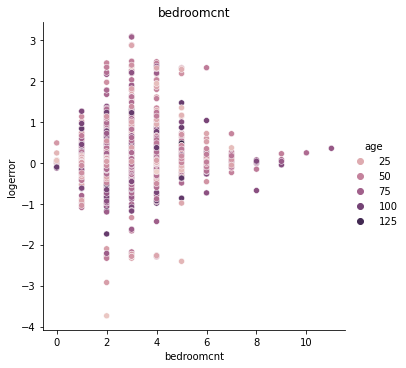

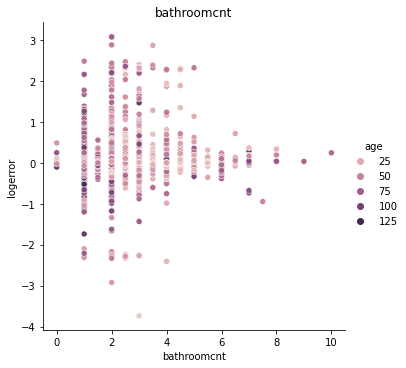

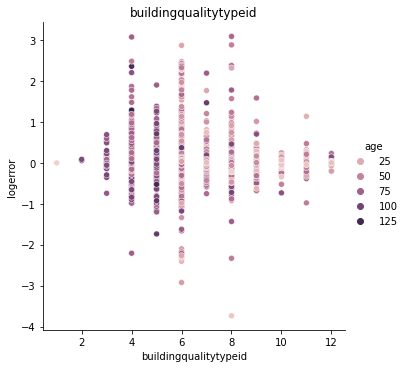

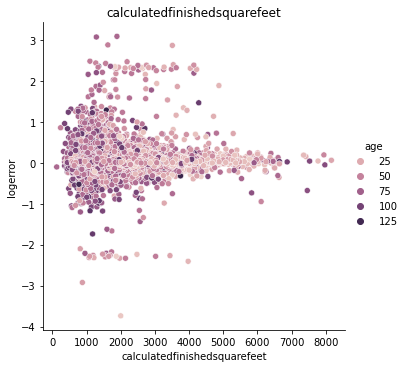

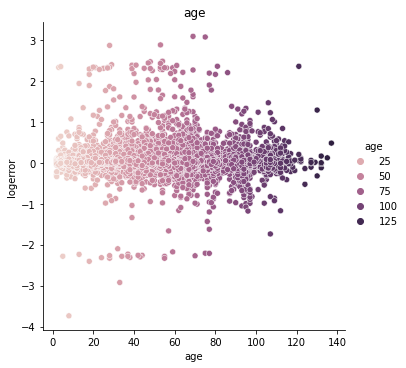

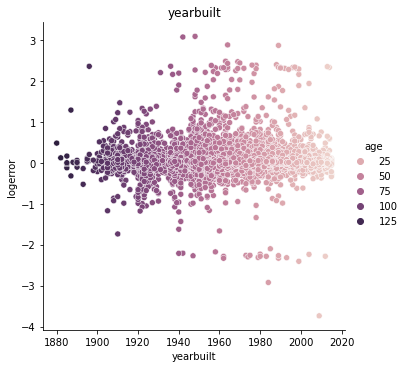

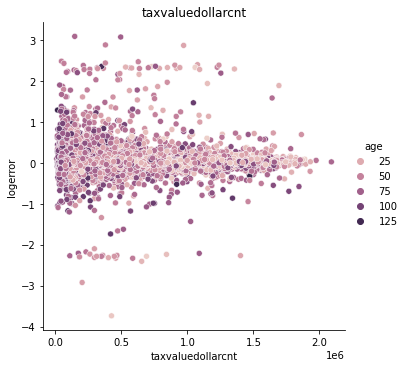

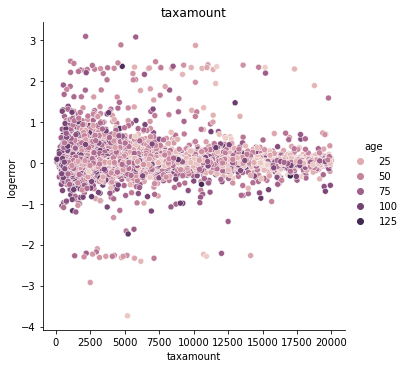

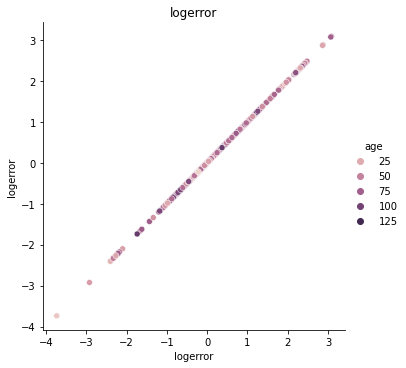

In [13]:
# This last group of graphs will compare features by logerror and group by age
for col in train[explore_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.age)
    plt.title(col)
    plt.show()

### Lets check for correlation with a heatmap

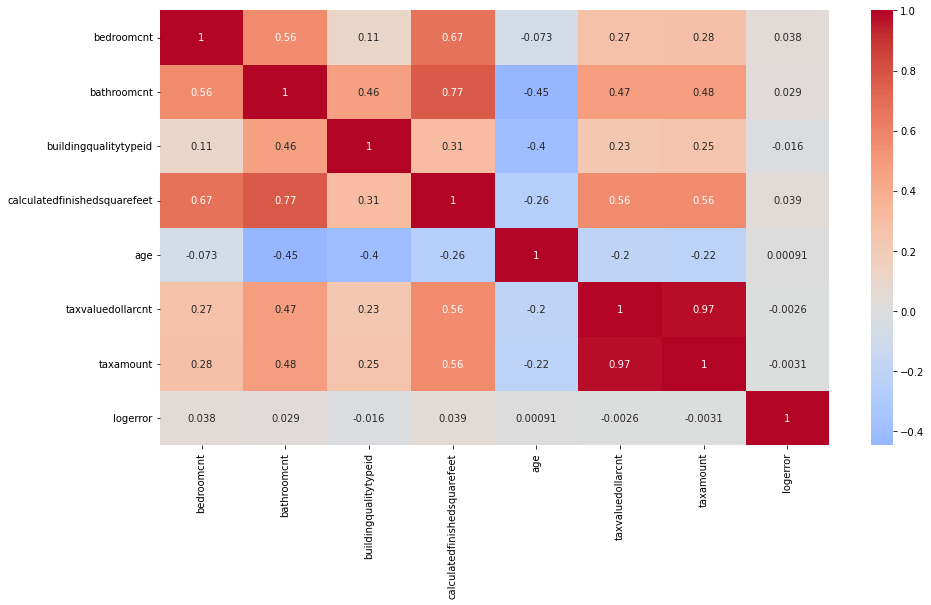

In [14]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(train[explore_columns].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

### Takeaways
- Newer homes tend to have higher logerror than older homes.
- Higher taxamounts seem to have a lower rate of logerror.
- Probably should bin the age variable.
- Weird, but LA County (fips 6037) was the only county to track buildingqualitytypeid
- According to the heatmap, calculatedfinishedsquarefeet was the feature that showed the most impact on logerror.

### Riddle me this:

- Does county have an affect on logerror?
- Is there a relationship between lot size and logerror?
- Does age affect logerror?
- Can tax variables be used to estimate logerror?

### Question 1: 

#### Does county have an affect on logerror?

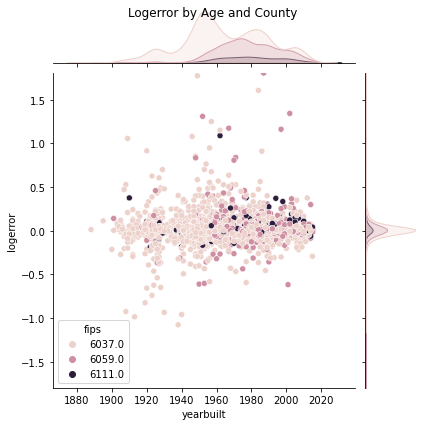

In [24]:
# Lets compare fips on our last graph
sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='fips', ylim=(-1.8, 1.8))
plt.suptitle('Logerror by Age and County')

plt.show()

In [25]:
# confirm with stats

# H0: LA County propeties has no significant impact on logerror than Orange and Ventura Counties
# Ha: LA County propeties does have a significant impact on logerror than Orange and Ventura Counties

stats.levene(train[train.fips == 6037].logerror, 
             train[train.fips != 6037].logerror
            )

LeveneResult(statistic=20.725664761943627, pvalue=5.316475646552766e-06)

In [26]:
# Can assume Equal Variance
# T-test
stats.ttest_ind(train[train.fips == 6037].logerror,
                train[train.fips != 6037].logerror,
                equal_var=True)

Ttest_indResult(statistic=-2.9780175613666824, pvalue=0.0029030209991701425)

### Question 2: 

#### Is there a relationship between square feet and logerror?

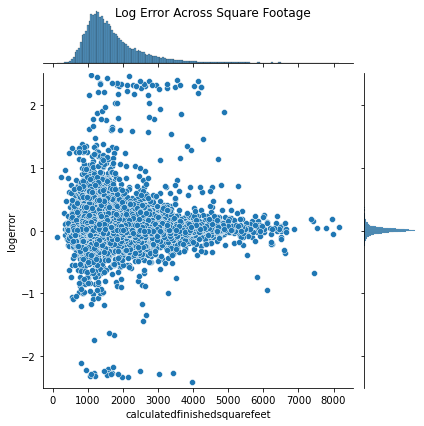

In [21]:
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, ylim=(-2.5, 2.5))
plt.suptitle('Log Error Across Square Footage')
plt.show()

### Takeaways

- Smaller homes have a higher log error, for sure.
- As home size increases, the log error decreases, suggesting some sort of correlation.

### Question 3
- Does age affect logerror?

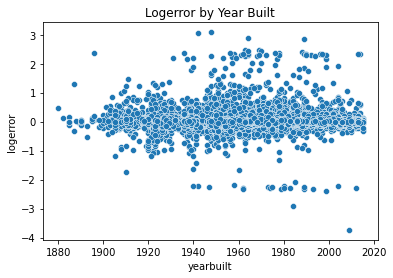

In [22]:
sns.scatterplot(data=train, y='logerror', x='yearbuilt')
plt.title('Logerror by Year Built')
plt.show()

In [ ]:
stats.ttest_ind(train.yearbuilt, train.logerror,
                equal_var=True)

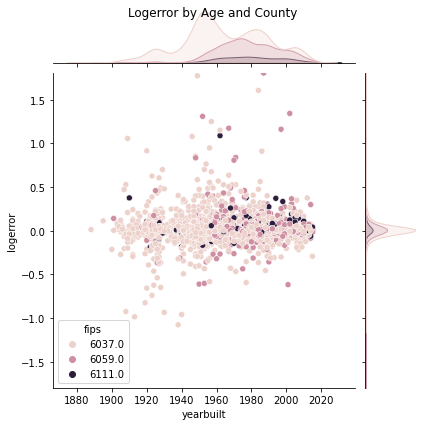

In [23]:
# logerror seems to be better before the 1950's


sample = train.sample(5000)
# Had to switch into a sample to get Logerror to work

sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='fips', ylim=(-1.8, 1.8))
plt.suptitle('Logerror by Age and County')

plt.show()

### Cluster time
- Visualize and compare metrics.
- Use calculatedfinishedsquarefeet and taxamount to find what k value has the best inertia.

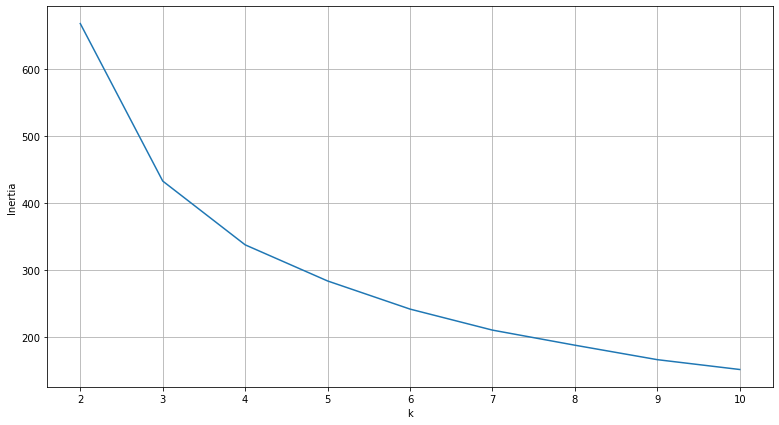

In [27]:
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

### K value of 3 seems to be the one.
- Next, we build the cluster model and fit to training sample.

In [28]:
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# means of each feature by cluster
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,
0,1.314809e+07,2.427289,3.219779,6.530820,1888.316502,6051.211101,3.399039e+07,-1.182006e+08,21097.653800,6.051484e+07,...,2422.656568,96642.692400,1.917938,199624.082885,5.366447e+05,2016.0,337020.624626,6509.859485,0.013172,43.642205
1,1.314620e+07,3.251760,3.731727,7.022740,2885.540336,6051.033027,3.394336e+07,-1.182089e+08,17319.584461,6.051280e+07,...,2393.010016,96687.923931,1.557932,406012.985111,1.092712e+06,2016.0,686699.054142,13110.512729,0.024046,39.753384
2,1.292873e+07,1.880309,2.707389,6.055513,1331.205104,6048.143020,3.402482e+07,-1.181889e+08,33594.151923,6.048464e+07,...,2565.361788,96589.807799,1.422777,99235.317987,2.169120e+05,2016.0,117676.637164,2752.812384,0.017133,52.400828


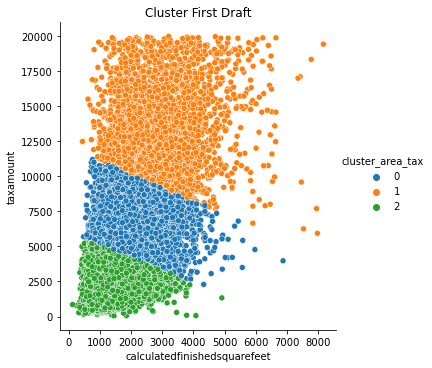

In [29]:
# Visualize clusters
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster First Draft')

plt.show()

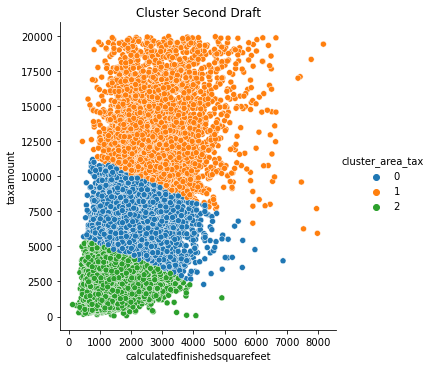

In [30]:
# rinse and repeat
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# visualize
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster Second Draft')

plt.show()

### Continued Cluster Exploration

- I know from my earlier exploration that age was an indicator
- I want to check with calculatedfinishedsquarefeet and taxamount as well, and then perhaps seperately

In [31]:
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'taxamount', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax_age'] = kmeans.predict(X)
train.cluster_area_tax_age = train.cluster_area_tax_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_tax_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_tax_age,,,,,,,,,,,,,,,,,,,,,
0,1.290452e+07,2.025732,3.085603,6.122120,1566.574478,6048.102191,3.399596e+07,-1.182073e+08,23178.388949,6.048397e+07,...,2543.516277,96598.505180,2.091887,123547.218876,360301.351922,2016.0,236754.133046,4414.861838,0.019431,56.999490
1,1.342445e+07,2.573154,2.962472,6.806593,1869.372235,6053.962789,3.400817e+07,-1.181620e+08,38224.150555,6.054249e+07,...,2302.948336,96753.182821,1.442282,223772.518542,481631.183835,2016.0,257858.665293,5883.326676,0.014672,26.358035
2,1.213863e+07,1.638289,2.692092,5.386128,1448.375324,6039.630510,3.402724e+07,-1.182604e+08,8478.325194,6.039970e+07,...,2993.425454,96230.805964,0.340752,116788.962619,389937.062446,2016.0,273148.099827,4858.453753,0.010831,88.224935


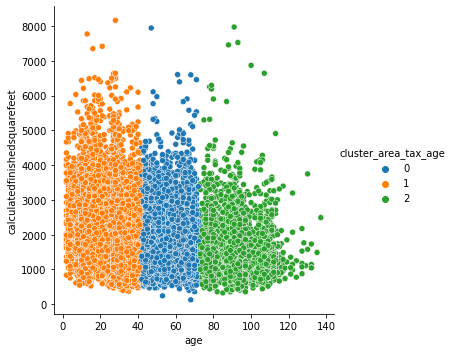

In [32]:
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_tax_age')
plt.show()


### Not happy with these results, I'm going to refine my features

In [33]:
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_age'] = kmeans.predict(X)
train.cluster_area_age = train.cluster_area_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,
0,1.290452e+07,2.025732,3.085603,6.122120,1566.574478,6048.102191,3.399596e+07,-1.182073e+08,23178.388949,6.048397e+07,...,2543.516277,96598.505180,2.091887,123547.218876,360301.351922,2016.0,236754.133046,4414.861838,0.019431,56.999490
1,1.342445e+07,2.573154,2.962472,6.806593,1869.372235,6053.962789,3.400817e+07,-1.181620e+08,38224.150555,6.054249e+07,...,2302.948336,96753.182821,1.442282,223772.518542,481631.183835,2016.0,257858.665293,5883.326676,0.014672,26.358035
2,1.213863e+07,1.638289,2.692092,5.386128,1448.375324,6039.630510,3.402724e+07,-1.182604e+08,8478.325194,6.039970e+07,...,2993.425454,96230.805964,0.340752,116788.962619,389937.062446,2016.0,273148.099827,4858.453753,0.010831,88.224935


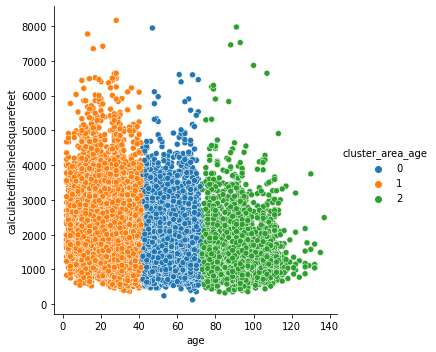

In [34]:
# Visualize
# Refinement didn't seem to change the cluster 
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_age')
plt.show()

### Takeaways
- This clustering seems to just seperate homes by age into 3 groups(0-40, 40-75, 75 and up)
- While the metrics for each cluster do have some distinct differences, most of the older homes will also only be in LA County, per our previous data

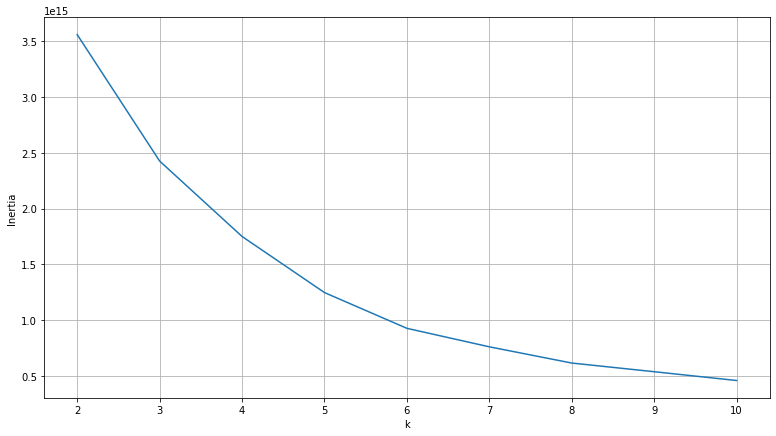

In [35]:
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

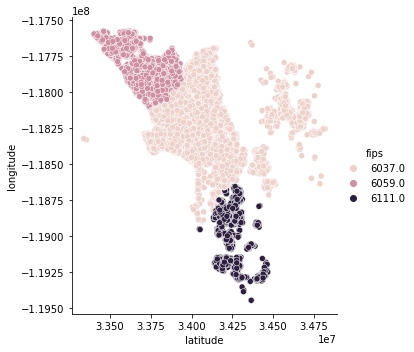

In [36]:
# a quick reference to county by geographical location
sns.relplot(data=train, x='latitude', y='longitude', hue='fips')
plt.show()

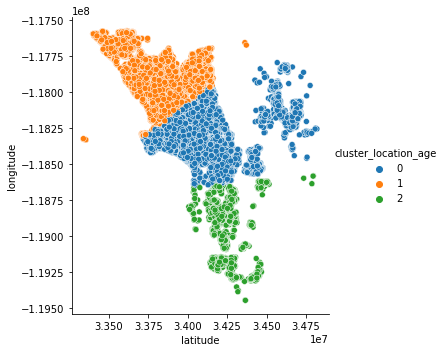

In [37]:
# Put together the cluster
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

In [38]:
# metrics
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,
0,1.158147e+07,2.174644,2.883272,6.611690,1620.784179,6037.004143,3.415279e+07,-1.183289e+08,41199.285802,6.037429e+07,...,3100.941776,96404.044228,0.000392,161868.920446,401129.319225,2016.0,239260.398780,5090.920687,0.012321,53.381424
1,1.378255e+07,2.198427,3.026577,6.029289,1687.864039,6051.304707,3.379367e+07,-1.178847e+08,15053.729404,6.051511e+07,...,1920.861689,96797.822696,2.429760,156420.166456,419582.217622,2016.0,263162.051166,5003.597823,0.020679,44.650395
2,1.670418e+07,2.390474,3.315425,6.173913,1912.394904,6103.028247,3.424319e+07,-1.189585e+08,18259.588203,6.103109e+07,...,2173.035447,96848.993631,5.802825,212113.776516,453963.941291,2016.0,241850.164774,5349.039864,0.017053,37.801717


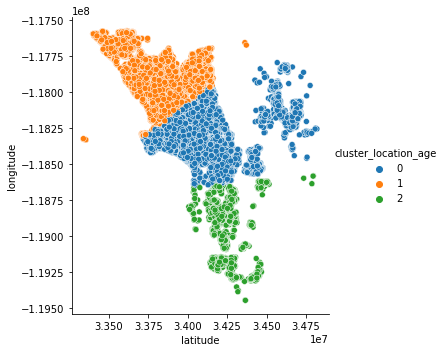

In [39]:
# Rinse and Repeat (cluster again)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

Takeaways
Cluster 3 seems to consist of only LA County(fips 6037), as well as older homes and a tendincy for more negative logerrors.
Doesnt divide the data too much differently than if we grouped by fips.

In [40]:
# calculatedfinishedsquarefeet and age
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,
0,1.290452e+07,2.025732,3.085603,6.122120,1566.574478,6048.102191,3.399596e+07,-1.182073e+08,23178.388949,6.048397e+07,...,2543.516277,96598.505180,2.091887,123547.218876,360301.351922,2016.0,236754.133046,4414.861838,0.019431,56.999490
1,1.342445e+07,2.573154,2.962472,6.806593,1869.372235,6053.962789,3.400817e+07,-1.181620e+08,38224.150555,6.054249e+07,...,2302.948336,96753.182821,1.442282,223772.518542,481631.183835,2016.0,257858.665293,5883.326676,0.014672,26.358035
2,1.213863e+07,1.638289,2.692092,5.386128,1448.375324,6039.630510,3.402724e+07,-1.182604e+08,8478.325194,6.039970e+07,...,2993.425454,96230.805964,0.340752,116788.962619,389937.062446,2016.0,273148.099827,4858.453753,0.010831,88.224935


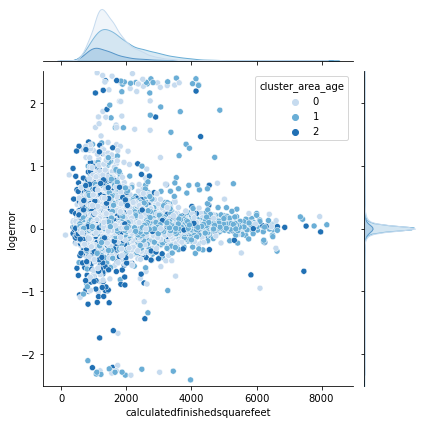

In [41]:
# calculatedfinishedsquarefeet and age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

In [42]:
# calculatedfinishedsquarefeet and taxamount
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,
0,1.314809e+07,2.427289,3.219779,6.530820,1888.316502,6051.211101,3.399039e+07,-1.182006e+08,21097.653800,6.051484e+07,...,2422.656568,96642.692400,1.917938,199624.082885,5.366447e+05,2016.0,337020.624626,6509.859485,0.013172,43.642205
1,1.314620e+07,3.251760,3.731727,7.022740,2885.540336,6051.033027,3.394336e+07,-1.182089e+08,17319.584461,6.051280e+07,...,2393.010016,96687.923931,1.557932,406012.985111,1.092712e+06,2016.0,686699.054142,13110.512729,0.024046,39.753384
2,1.292873e+07,1.880309,2.707389,6.055513,1331.205104,6048.143020,3.402482e+07,-1.181889e+08,33594.151923,6.048464e+07,...,2565.361788,96589.807799,1.422777,99235.317987,2.169120e+05,2016.0,117676.637164,2752.812384,0.017133,52.400828


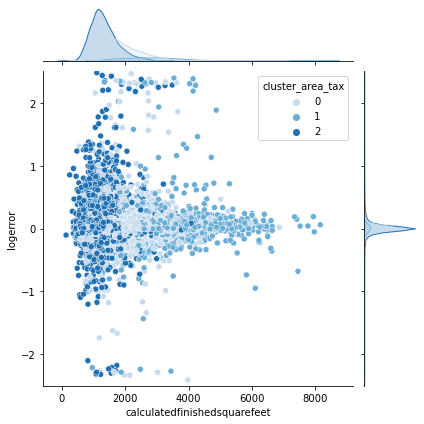

In [43]:
# calculatedfinishedsquarefeet and taxamount
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_tax', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

In [44]:

# latitude, longitude, age
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,
0,1.158147e+07,2.174644,2.883272,6.611690,1620.784179,6037.004143,3.415279e+07,-1.183289e+08,41199.285802,6.037429e+07,...,3100.941776,96404.044228,0.000392,161868.920446,401129.319225,2016.0,239260.398780,5090.920687,0.012321,53.381424
1,1.378255e+07,2.198427,3.026577,6.029289,1687.864039,6051.304707,3.379367e+07,-1.178847e+08,15053.729404,6.051511e+07,...,1920.861689,96797.822696,2.429760,156420.166456,419582.217622,2016.0,263162.051166,5003.597823,0.020679,44.650395
2,1.670418e+07,2.390474,3.315425,6.173913,1912.394904,6103.028247,3.424319e+07,-1.189585e+08,18259.588203,6.103109e+07,...,2173.035447,96848.993631,5.802825,212113.776516,453963.941291,2016.0,241850.164774,5349.039864,0.017053,37.801717


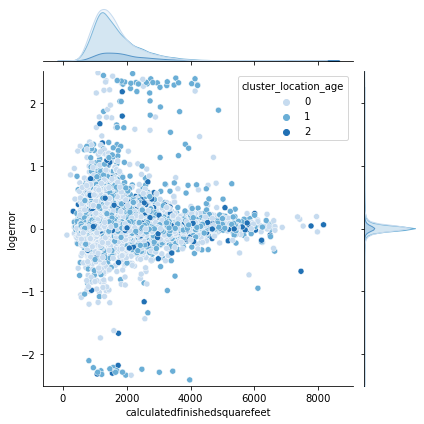

In [45]:
# latitude, longitude, age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_location_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

### Takeaways
- Based off visuals and metrics taken on the 3 cluster groups, the cluster_area_tax group has the most relevant data that will hold the most weight for a model
- Cluster_area_tax will more than likely be the only cluster group I use as a feature when modeling

## Let's Build Some Models
- First, add cluster features to train validate samples.
- Set up prediction tables
- Apply models to samples and make predictions

In [46]:
# set up cluster for validate
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_validate_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
validate['cluster_area_tax'] = kmeans.predict(X)
validate.cluster_area_tax = validate.cluster_area_tax.astype('category')


# add cluster to data
dummy_df = pd.get_dummies(train['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to train 
x_train_scaled = pd.concat([x_train_scaled, dummy_df], axis=1)

# add cluster to validate data
dummy_df = pd.get_dummies(validate['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to validate 
x_validate_scaled = pd.concat([x_validate_scaled, dummy_df], axis=1)


# train
predictions = pd.DataFrame()
predictions['actual'] = train.logerror
predictions['baseline'] = train.logerror.median()

# validate
validate_predictions = pd.DataFrame()
validate_predictions['actual'] = validate.logerror
validate_predictions['baseline'] = validate.logerror.median()

### Advanced Baseline Model - Simple Linear Regression

In [47]:
# Our 'Adv. Baseline' is just a simple linear regression based off sqr_feet

x_train_bl = x_train_scaled[['age']]
x_validate_bl = x_validate_scaled[['age']]

model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_bl, y_train)
predictions['adv_baseline'] = model.predict(x_train_bl)

# validate
validate_predictions['adv_baseline_validate'] = model.predict(x_validate_bl)

# score
model.score(x_train_bl, y_train)

8.359275739389105e-07

In [48]:
# The math behind our advanced baseline model
m, b = model.coef_[0], model.intercept_

print(f'Tax Value = {m:.4f} x sqr_feet + {b:.4f}')

Tax Value = 0.0000 x sqr_feet + 0.0161


### Multiple Regression

In [49]:
# multiple regression
model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_scaled, y_train)
predictions['multi_regression'] = model.predict(x_train_scaled)

# validate
validate_predictions['multi_regression_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.004474400047580596

### Multiple regression with RME

In [50]:
# Multiple regression with RME
model = sklearn.linear_model.LinearRegression()
rfe = sklearn.feature_selection.RFE(model, n_features_to_select=4)

# train
rfe.fit(x_train_scaled, y_train)
x_train_rfe = rfe.transform(x_train_scaled)
model.fit(x_train_rfe, y_train)
predictions['multiple_rfe'] = model.predict(x_train_rfe)

# validate
x_validate_rfe = rfe.transform(x_validate_scaled)
validate_predictions['multiple_rfe_validate'] = model.predict(x_validate_rfe)

# score
model.score(x_train_rfe, y_train)

0.0003287834820238089

### KNN (k=2)

In [51]:
# KNN (k=2)
model = KNeighborsRegressor(n_neighbors=2)

# train
model.fit(x_train_scaled, y_train)
predictions['KNN(k=2)'] = model.predict(x_train_scaled)

# validate
validate_predictions['KNN(k=2)_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.5123756047672219

### Compare our train and validate predictions
- The numbers don't lie
- Compare performance metrics of each model
- Use RMSE for determining the best model

In [52]:
# Compare how these models work on the train sample
pd.concat([
    predictions.apply(lambda col: r2_score(predictions.actual, col)).rename('r2'),
    predictions.apply(lambda col: mean_squared_error(predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000e+00,0.000000,0.000000
baseline,-3.877696e-03,0.026316,0.162222
adv_baseline,8.359276e-07,0.026214,0.161908
multi_regression,4.474400e-03,0.026097,0.161546
multiple_rfe,3.287835e-04,0.026206,0.161882
KNN(k=2),5.123756e-01,0.012783,0.113061


In [53]:
# Compare how these models work on the validate sample
pd.concat([
    validate_predictions.apply(lambda col: r2_score(validate_predictions.actual, col)).rename('r2'),
    validate_predictions.apply(lambda col: mean_squared_error(validate_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.003440,0.029543,0.171881
adv_baseline_validate,-0.000016,0.029442,0.171587
multi_regression_validate,0.000989,0.029413,0.171501
multiple_rfe_validate,0.000575,0.029425,0.171537
KNN(k=2)_validate,-0.448479,0.042646,0.206508
